# Úkol č. 1 - redukce dimenzionality a binární klasifikace

  * **Deadline je do 8. 5. 2023, 23:59:59**, pokud odevzdáte úkol do 14. 5. 2023, 23:59:59, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu se musíte vypořádat s vysokou dimenzí problému a poté úspěšně aplikovat vhodný klasfikační model.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 28x28 pixelů ve stupních šedi, které byly získány z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Postupně aplikujte modely **SVM**, **naivní Bayesův klasifikátor** a **LDA**, přičemž pro každý z nich:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Vyberte si hlavní hyperparametry k ladění (pokud model má hyperparametry) a najděte jejich nejlepší hodnoty.
      * Experimentujte se standardizací/normalizací dat.
      * U SVM vyzkoušejte alespoň dvě různé jádrové funkce.
      * Získané výsledky vždy řádně okomentujte.


  * Postupně aplikujte metody redukce dimenzionality PCA a LLE, přičemž pro každou z nich: 
      * Zopakujte předchozí kroky a pokuste modely vylepšit
      * Zkoumejte jaká dimenze je z hlediska výkonnosti finálního modelu nejlepší.
      * Získané výsledky vždy řádně okomentujte.
    
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.
  
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do dvou sloupců: **ID**, **predikce labelu**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

In [1]:
#main libs
import pandas as pd
import numpy as np

#evaluation/model selection
from   sklearn.model_selection import train_test_split
#from   sklearn.metrics import mean_squared_error
from   sklearn.model_selection import ParameterGrid
from   sklearn.metrics import accuracy_score

#preprocessing/decomposition data
from   sklearn.preprocessing import StandardScaler
from   sklearn.preprocessing import MinMaxScaler
from   sklearn.decomposition import PCA
from   sklearn.manifold import LocallyLinearEmbedding

#models
from   sklearn.svm         import SVC
from   sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#plots
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv("train.csv")
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,2,1,4,2,0,0,...,37,73,65,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,105,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,135,135,184,59,0,2,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,70,0,0,0,0,0,0,0,0,0


In [3]:
Xdata = data.drop("label", axis = 1)
ydata = data.label

In [4]:
random_seed = 33 #constant for random_state

Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size = 0.5, random_state = random_seed) 
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size = 0.15, random_state = random_seed)

In [5]:
Xval


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
1098,0,0,0,0,0,0,0,0,0,22,...,92,0,0,0,0,0,0,0,0,0
1846,0,0,0,0,0,0,0,27,38,41,...,18,15,10,0,0,0,0,0,0,0
1810,0,0,0,1,0,0,0,0,0,0,...,102,103,112,16,0,3,0,0,0,0
1308,0,0,0,0,0,0,0,0,54,200,...,161,187,180,118,0,0,0,0,0,0
339,0,0,0,0,0,0,0,0,19,0,...,152,159,79,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,0,0,0,0,0,1,3,1,0,0,...,137,137,144,148,4,0,2,0,0,0
251,0,0,0,0,0,0,0,0,2,0,...,127,0,0,0,0,0,0,0,0,0
1720,0,0,0,0,0,0,0,0,0,8,...,219,216,196,209,70,0,8,0,0,0
1790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
### odtud už je to Vaše
val_arr_pca = []
max_comp_count = Xtrain.shape[1]
for i in range(1, max_comp_count):
    pca = PCA(n_components=i)
    Xtrain_pca = pca.fit_transform(Xtrain)
    Xval_pca = pca.fit_transform(Xval)

    clf_pca = SVC(C = 0.5, kernel = 'rbf')
    clf_pca.fit(Xtrain_pca, ytrain)
    val_arr_pca.append(accuracy_score(yval, clf_pca.predict(Xval_pca)))
print(f"Best accuracy score is {max(val_arr_pca)} for dimension {np.argmax(val_arr_pca) + 1}")


Best accuracy score is 0.9803921568627451 for dimension 13


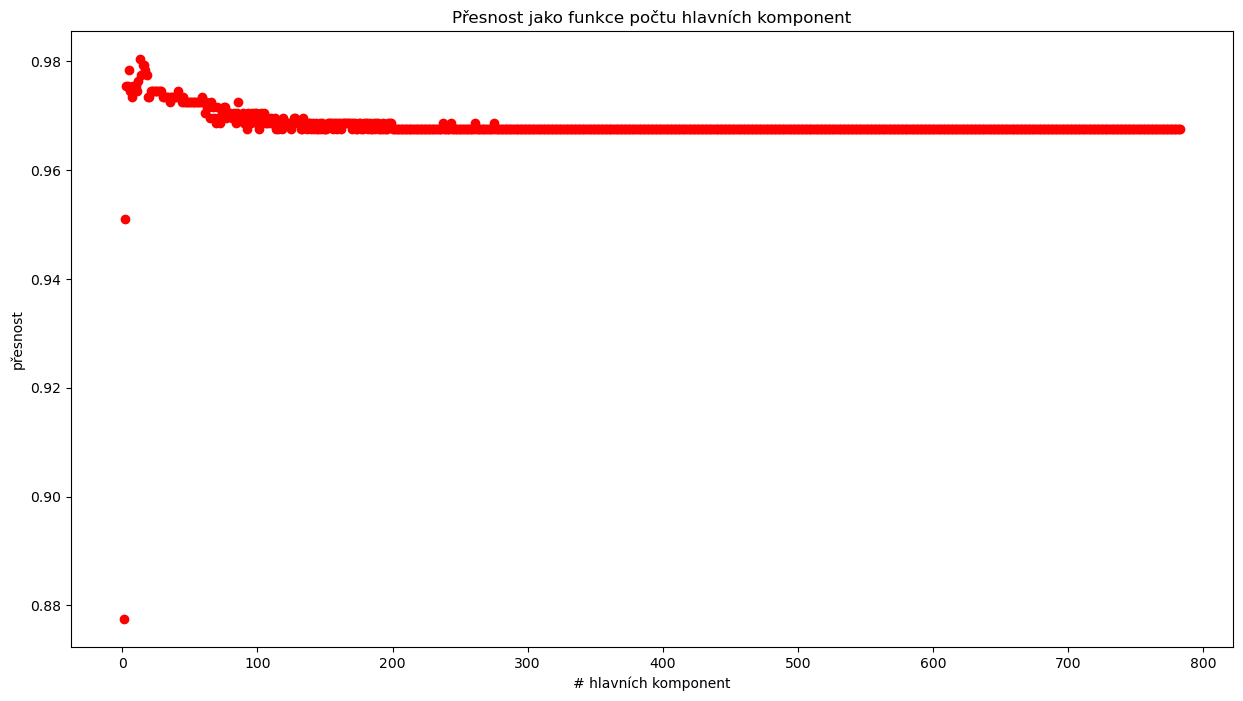

In [18]:
val_arr_pca = np.array(val_arr_pca)
plt.subplots(1,1, figsize=(15, 8))
ns = plt.scatter(range(1,max_comp_count), val_arr_pca, c='red')
plt.title(u"Přesnost jako funkce počtu hlavních komponent")
plt.xlabel(u'# hlavních komponent')
plt.ylabel('přesnost')
#plt.plot([0, 481], [full_acc, full_acc],'b-')
plt.show()

In [8]:
val_arr_lle = []
max_comp_count = Xtrain.shape[1]
max_comp_count = 400
for i in range(1, max_comp_count):
    lle = LocallyLinearEmbedding(n_components = i)
    Xtrain_lle = lle.fit_transform(Xtrain)
    Xval_lle = lle.transform(Xval)

    clf_lle = SVC(C = 0.5, kernel = 'rbf')
    clf_lle.fit(Xtrain_lle, ytrain)
    val_arr_lle.append(accuracy_score(yval, clf_lle.predict(Xval_lle)))
print(f"Best accuracy score is {max(val_arr_lle)} for dimension {np.argmax(val_arr_lle) + 1}")

Best accuracy score is 0.984313725490196 for dimension 60


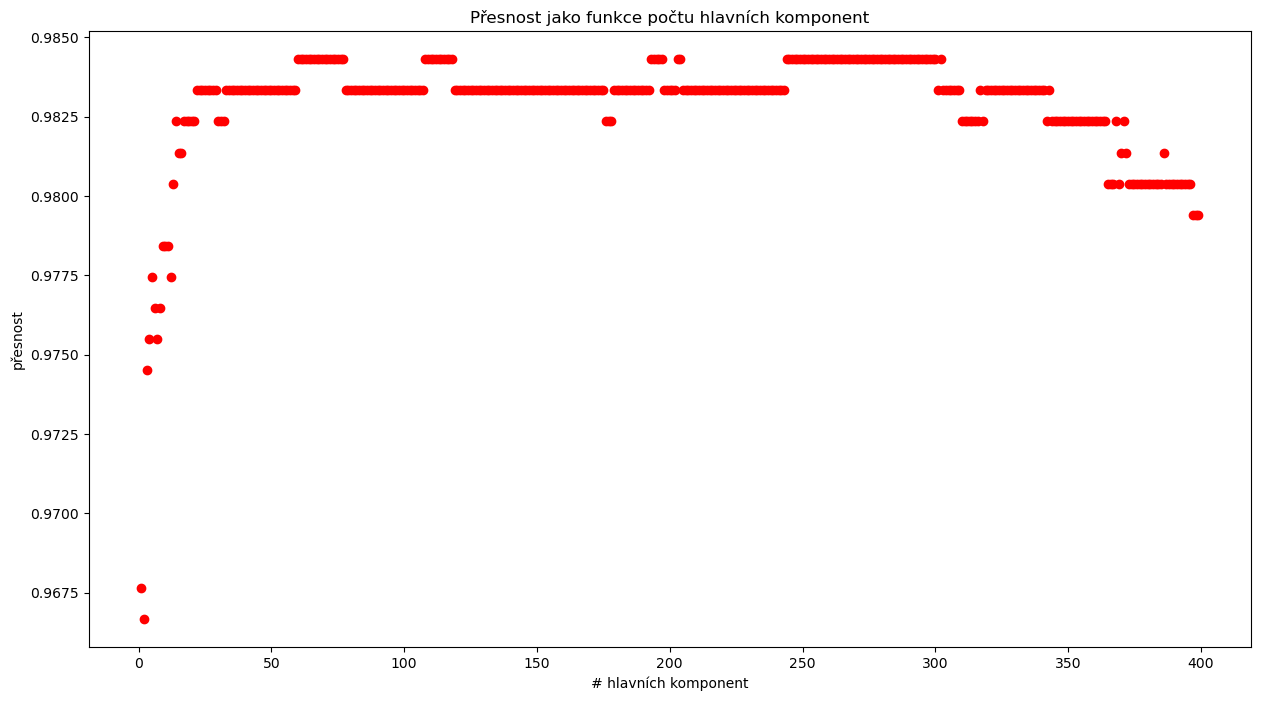

In [9]:
val_arr_lle = np.array(val_arr_lle)
plt.subplots(1,1, figsize=(15, 8))
ns = plt.scatter(range(1,max_comp_count), val_arr_lle, c='red')
plt.title(u"Přesnost jako funkce počtu hlavních komponent")
plt.xlabel(u'# hlavních komponent')
plt.ylabel('přesnost')
#plt.plot([0, 481], [full_acc, full_acc],'b-')
plt.show()

In [13]:
pca2 = PCA(n_components=2)
Xtrain_pca2 = pca2.fit_transform(Xtrain)
Xtrain_pca2

array([[ -639.85586852,    81.09107585],
       [ -978.02827636,  -596.03828394],
       [ -993.66259294,   222.92411449],
       ...,
       [ -383.9360189 ,  1316.61477456],
       [-1216.80455664,    43.87916516],
       [  981.69360926,   324.64893386]])

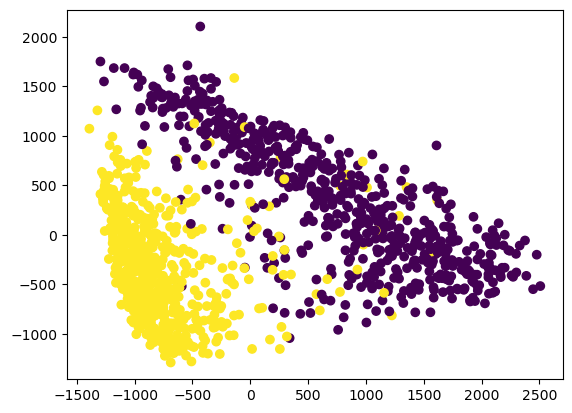

In [14]:
plt.scatter(Xtrain_pca2[:, 0], Xtrain_pca2[:, 1], c=ytrain)

In [15]:
lle2 = LocallyLinearEmbedding(n_components=2)
Xtrain_lle2 = lle2.fit_transform(Xtrain)
Xtrain_lle2

array([[-0.02880022,  0.00087825],
       [-0.03018449,  0.00275587],
       [-0.02924412,  0.00176702],
       ...,
       [ 0.03090856, -0.05199957],
       [-0.02973387,  0.00280899],
       [ 0.03091471,  0.01163881]])

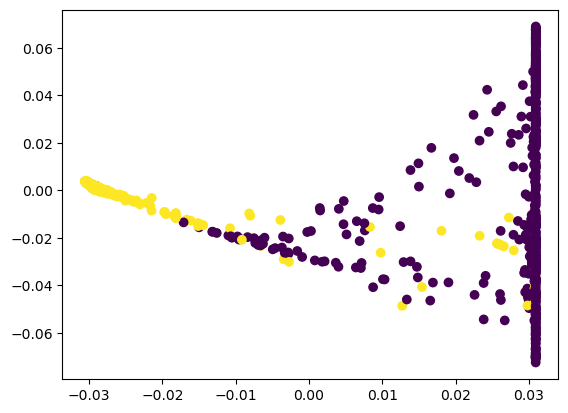

In [16]:
plt.scatter(Xtrain_lle2[:, 0], Xtrain_lle2[:, 1], c=ytrain)

In [ ]:
res_dict = {}